### Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Baca Gambar

In [2]:
img = cv2.imread('Nama.jpg') 
if img is None:
    print("Citra tidak dapat dimuat. Pastikan path gambar benar.")
else:
    print("Citra berhasil dimuat.")

Citra berhasil dimuat.


### Tampilkan gambar asli dan histogram RGB

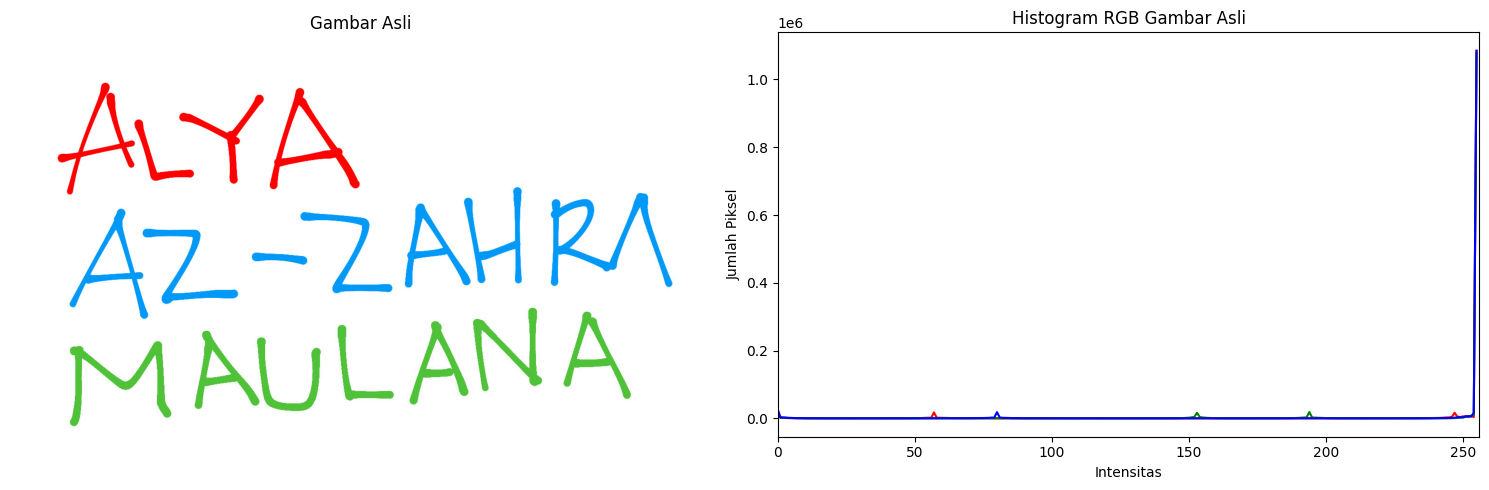

In [3]:
output_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axis = plt.subplots(1, 2, figsize=(15, 5))

axis[0].imshow(output_rgb)
axis[0].set_title("Gambar Asli")
axis[0].axis('off')

colors = ('r', 'g', 'b')
for i, col in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    axis[1].plot(hist, color=col)
axis[1].set_xlim([0, 256])
axis[1].set_title("Histogram RGB Gambar Asli")
axis[1].set_xlabel("Intensitas")
axis[1].set_ylabel("Jumlah Piksel")

plt.tight_layout()
plt.show()

### Histogram RGB

In [4]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

### Konversi ke HSV

In [5]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

### Rentang warna HSV

In [6]:
# Mask warna merah
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask_red = cv2.inRange(hsv, lower_red1, upper_red1) | cv2.inRange(hsv, lower_red2, upper_red2)

# Mask warna hijau
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# Mask warna biru
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# Mask background putih (biar tetap putih)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 40, 255])
mask_white = cv2.inRange(hsv, lower_white, upper_white)

# Menggabungkan mask warna target + background putih
red_result = cv2.bitwise_or(mask_red, mask_white)
green_result = cv2.bitwise_or(mask_green, mask_white)
blue_result = cv2.bitwise_or(mask_blue, mask_white)

### Tampilkan hasil deteksi warna

In [7]:
def show_result_and_hist(image_mask, title):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    axes[0].imshow(image_mask, cmap='gray')
    axes[0].set_title(f"{title}")
    axes[0].axis('off')

    hist = cv2.calcHist(image_mask, [0], None, [256], [0, 256])
    axes[1].plot(hist, color='black')
    axes[1].set_title(f"Histogram {title}")
    axes[1].set_xlabel("Intensitas")
    axes[1].set_ylabel("Jumlah Piksel")
    axes[1].set_xlim([0, 256])

    plt.tight_layout()
    plt.show()

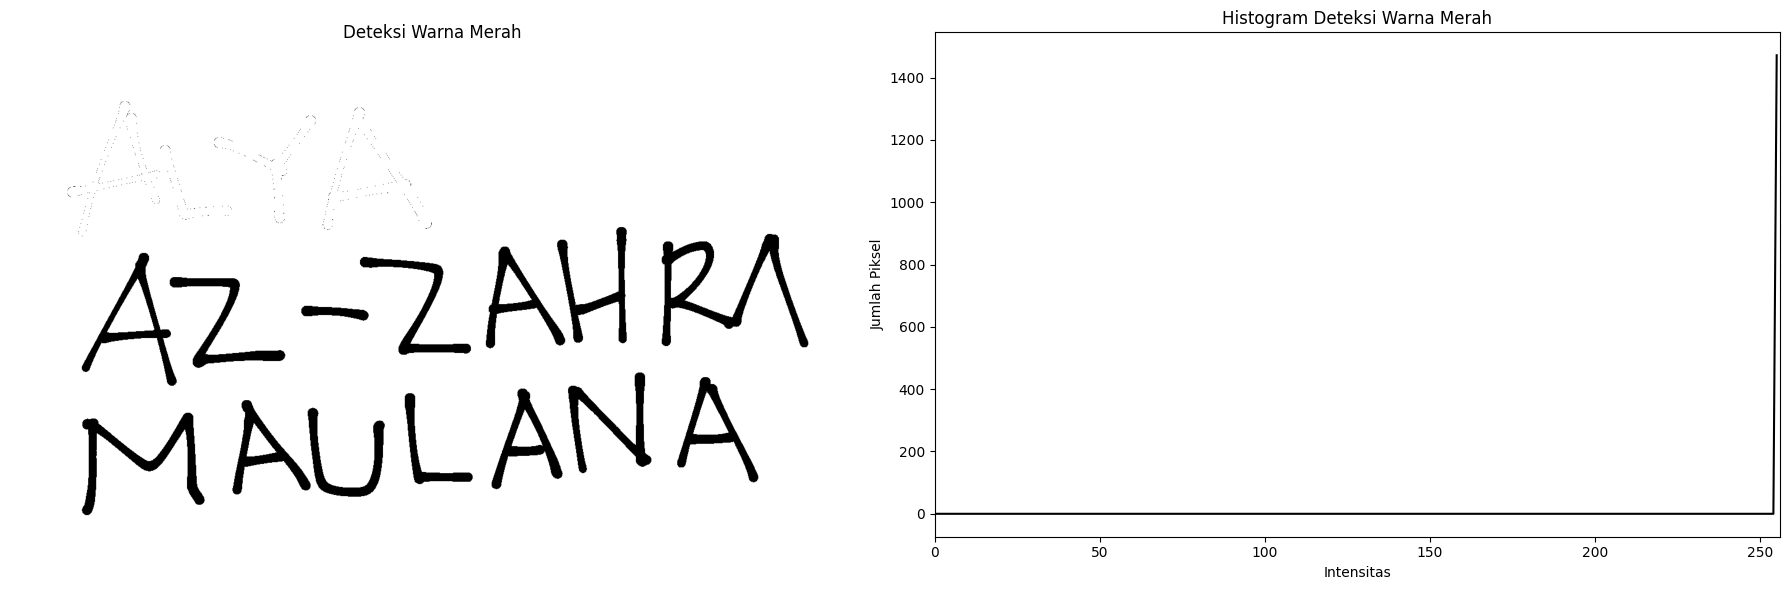

In [8]:
show_result_and_hist(red_result, "Deteksi Warna Merah")

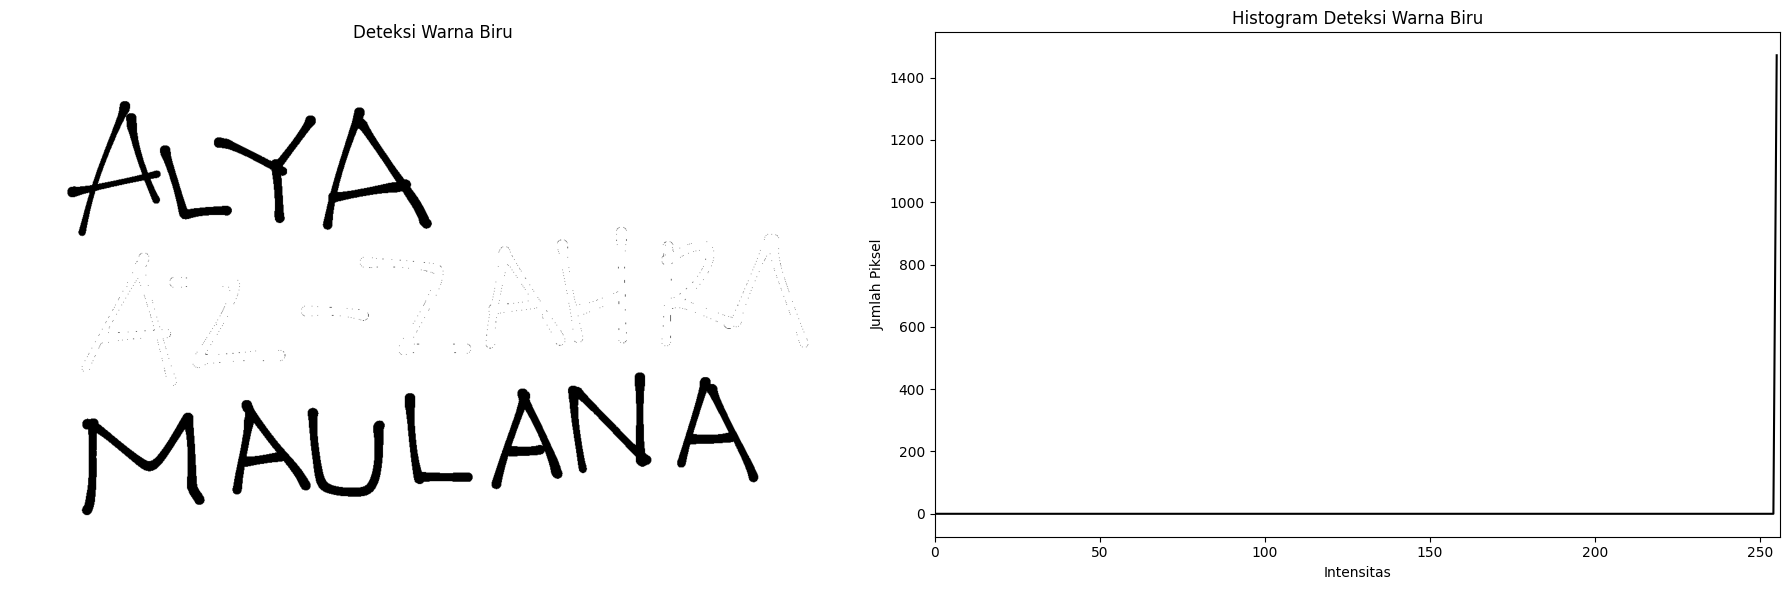

In [9]:
show_result_and_hist(blue_result, "Deteksi Warna Biru")

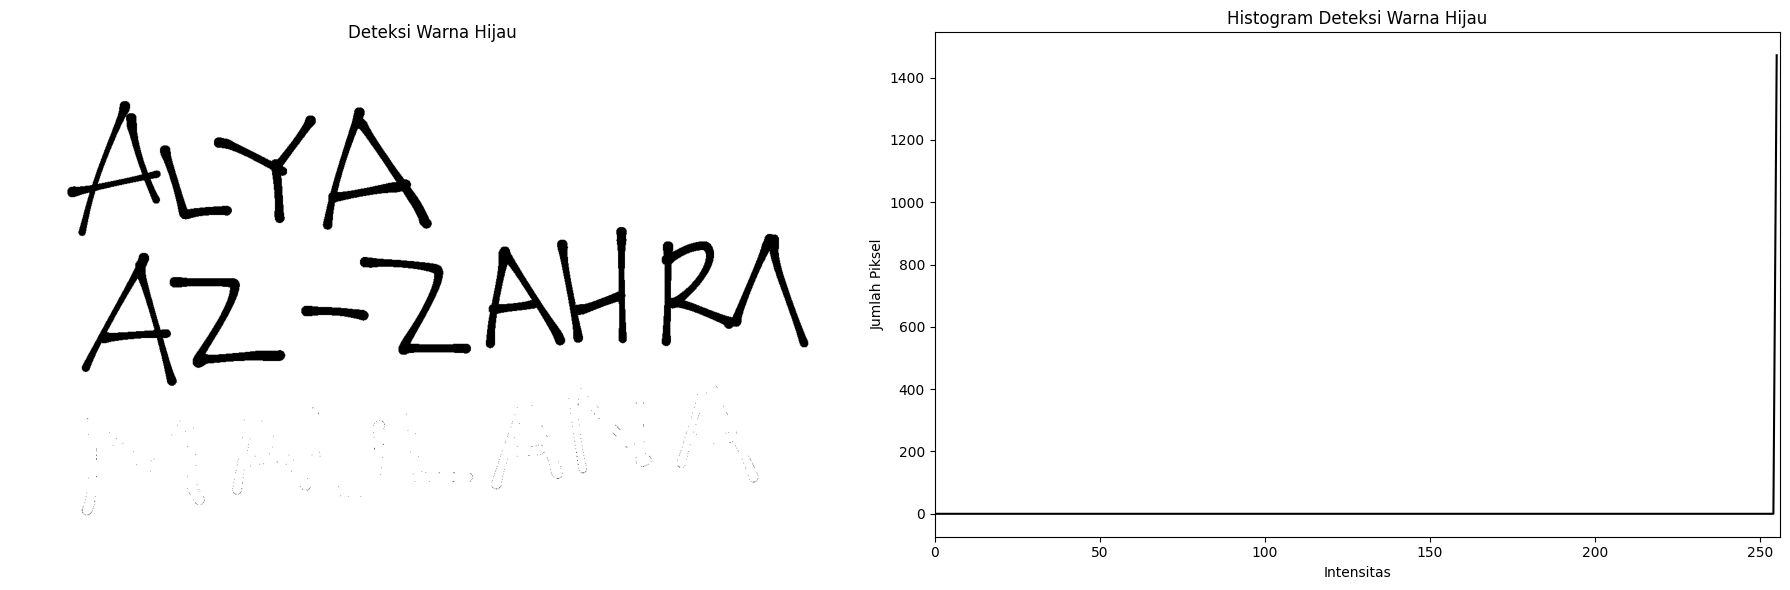

In [10]:
show_result_and_hist(green_result, "Deteksi Warna Hijau")